<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/hinge_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score




In [12]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [13]:
!ls /content/drive/MyDrive/datasets/ECG/

mitbih_test.csv  mitbih_train.csv


In [14]:
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH,header=None)
test  = pd.read_csv(TEST_PATH,header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [16]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


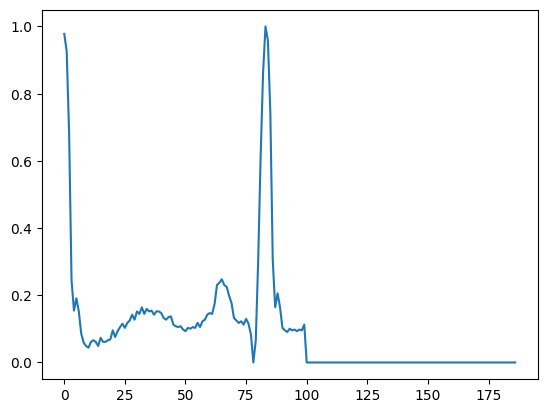

In [18]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [19]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


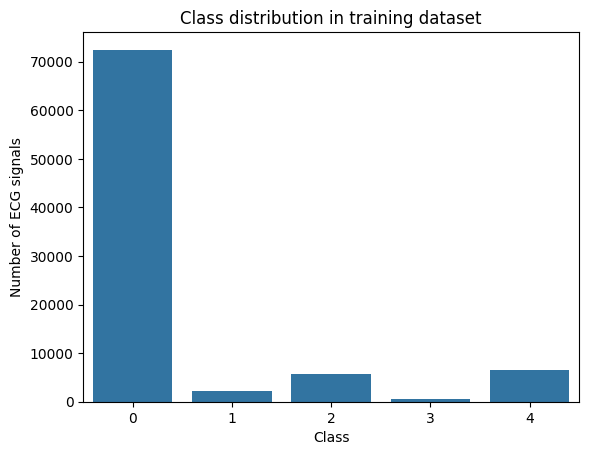

In [20]:
# Visualize the number of subjects in each class in the train dataset:
counts = train.iloc[:, -1].value_counts().sort_index()
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=counts.values)
plt.xlabel("Class")
plt.ylabel("Number of ECG signals")
plt.title("Class distribution in training dataset")
plt.show()

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# checking missing values:
train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [23]:
test.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [37]:
#X = train.iloc[:, :-1]   # 0–186
#y = train.iloc[:, -1]    # class labels (0–4)
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [38]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_res, y_res = smote.fit_resample(X, y)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)



In [39]:

y_res_cat = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)



In [40]:

X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)



In [41]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))

    # 🔴 IMPORTANT CHANGE FOR HINGE
    model.add(Dense(5, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='hinge',          # 🔴 CHANGED
        metrics=['accuracy']
    )
    return model


In [42]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7858 - loss: 0.1996 - val_accuracy: 0.9186 - val_loss: 0.0816
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9284 - loss: 0.0736 - val_accuracy: 0.9434 - val_loss: 0.0610
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9490 - loss: 0.0553 - val_accuracy: 0.9560 - val_loss: 0.0492
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9581 - loss: 0.0465 - val_accuracy: 0.9657 - val_loss: 0.0400
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9648 - loss: 0.0404 - val_accuracy: 0.9667 - val_loss: 0.0395
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9697 - loss: 0.0355 - val_accuracy: 0.9694 - val_loss: 0.0365
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9732 - loss: 0.0317 - val_accuracy: 0.9743 - val_loss: 0.0320
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9762 - loss: 0

In [30]:
y_train_hinge = 2 * y_train_cat - 1
y_val_hinge   = 2 * y_val_cat - 1
y_test_hinge  = 2 * y_test_cat - 1


In [31]:
def ann_model():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))

    # IMPORTANT: No softmax for hinge loss
    model.add(Dense(5, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='hinge',
        metrics=['accuracy']
    )

    return model


In [32]:
model = ann_model()

history = model.fit(
    X_train,
    y_train_hinge,
    validation_data=(X_val, y_val_hinge),
    epochs=10,
    batch_size=64
)


Epoch 1/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8999 - loss: 0.1145 - val_accuracy: 0.9554 - val_loss: 0.0460
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9556 - loss: 0.0452 - val_accuracy: 0.9643 - val_loss: 0.0370
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9627 - loss: 0.0386 - val_accuracy: 0.9687 - val_loss: 0.0327
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9683 - loss: 0.0329 - val_accuracy: 0.9671 - val_loss: 0.0335
Epoch 5/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9708 - loss: 0.0306 - val_accuracy: 0.9743 - val_loss: 0.0301
Epoch 6/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9731 - loss: 0.0282 - val_accuracy: 0.9752 - val_loss: 0.0281
Epoch 7/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9743 - loss: 0.0277 - val_accuracy: 0.9749 - val_loss: 0.0279
Epoch 8/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9760 - loss: 0.0255 - val_accuracy: 0.

In [43]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)



2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9733838626383992


In [44]:
test_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9450 - loss: 0.0660
Test Accuracy: 0.9422163367271423
Test Loss: 0.07057708501815796


In [47]:
print(classification_report(
    y_true=np.argmax(y_test_cat, axis=1),
    y_pred=np.argmax(test_predictions, axis=1)
))


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     18118
           1       0.47      0.80      0.59       556
           2       0.85      0.94      0.89      1448
           3       0.35      0.88      0.50       162
           4       0.94      0.98      0.96      1608

    accuracy                           0.94     21892
   macro avg       0.72      0.91      0.78     21892
weighted avg       0.96      0.94      0.95     21892



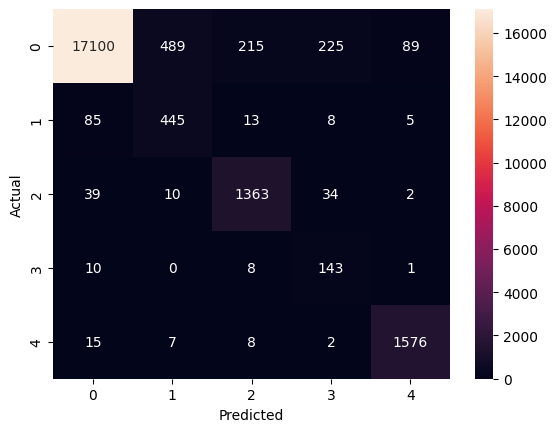

In [50]:
cm = confusion_matrix(
    np.argmax(y_test_cat, axis=1),
    np.argmax(test_predictions, axis=1)
)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_res,
    y_res_cat,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-validation scores:", results)
print("Mean CV accuracy:", results.mean())


Cross-validation scores: [0.97562618 0.9781872  0.98148782 0.97833046]
Mean CV accuracy: 0.9784079146763492
